In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Hold out evaluation

In [2]:
df = pd.read_csv('data.csv')

In [3]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

## Train decision tree with default parameters

In [5]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline
from category_encoders import TargetEncoder

model = Pipeline([
    ('te', TargetEncoder(cols=['nationality'])),
    ('dt', DecisionTreeRegressor())
])
model.fit(X_train, y_train)

Pipeline(steps=[('te', TargetEncoder(cols=['nationality'])),
                ('dt', DecisionTreeRegressor())])

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    mae = mean_absolute_error(y, y_pred)
    r2 = r2_score(y, y_pred)
    return mse, mae, r2

def print_metrics(mse, mae, r2):
    print(f'MSE: {mse:.3f}')
    print(f'MAE: {mae:.3f}')
    print(f'R2: {r2:.3f}')

In [7]:
mse_train, mae_train, r2_train = evaluate_model(model, X_train, y_train)
print('Training Set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(model, X_test, y_test)
print('\nTest Set:')
print_metrics(mse_test, mae_test, r2_test)

Training Set:
MSE: 0.000
MAE: 0.000
R2: 1.000

Test Set:
MSE: 9.423
MAE: 2.129
R2: 0.804


In [ ]:
max_depths = np.arange(1, 21)
mse_train_values, mse_test_values = [], []
mae_train_values, mae_test_values = [], []
r2_train_values, r2_test_values = [], []

for depth in max_depths:
    model = Pipeline([
        ('te', TargetEncoder(cols=['nationality'])),
        ('dt', DecisionTreeRegressor(max_depth=depth))
    ])
    model.fit(X_train, y_train)
    
    mse_train, mae_train, r2_train = evaluate_model(model, X_train, y_train)
    mse_test, mae_test, r2_test = evaluate_model(model, X_test, y_test)

    mse_train_values.append(mse_train)
    mse_test_values.append(mse_test)

    mae_train_values.append(mae_train)
    mae_test_values.append(mae_test)
    
    r2_train_values.append(r2_train)
    r2_test_values.append(r2_test)

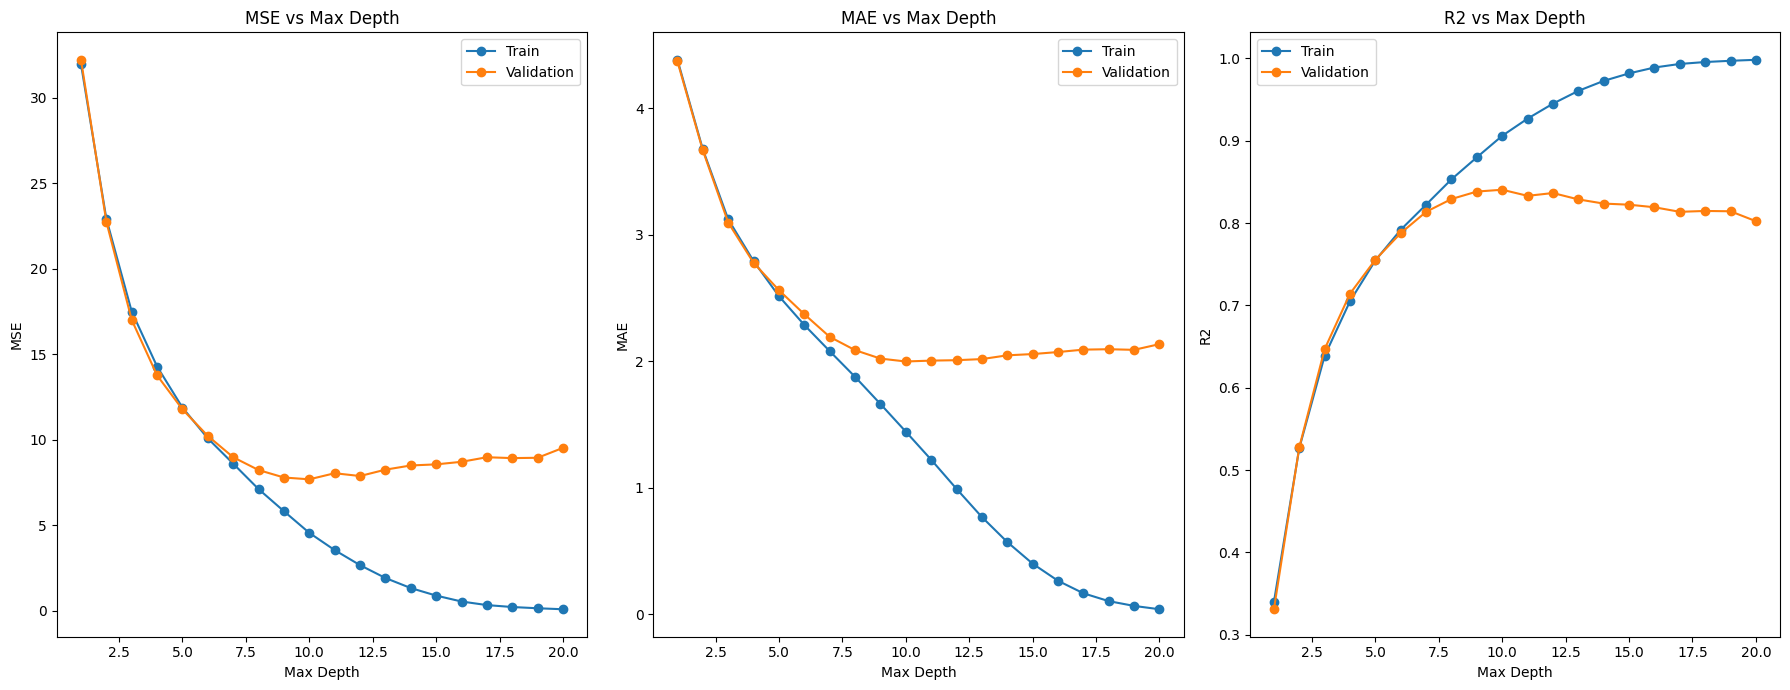

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 7))

plt.subplot(1, 3, 1)
plt.plot(max_depths, mse_train_values, label='Train', marker='o')
plt.plot(max_depths, mse_test_values, label='Validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('MSE')
plt.legend()
plt.title('MSE vs Max Depth')

plt.subplot(1, 3, 2)
plt.plot(max_depths, mae_train_values, label='Train', marker='o')
plt.plot(max_depths, mae_test_values, label='Validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('MAE')
plt.legend()
plt.title('MAE vs Max Depth')

plt.subplot(1, 3, 3)
plt.plot(max_depths, r2_train_values, label='Train', marker='o')
plt.plot(max_depths, r2_test_values, label='Validation', marker='o')
plt.xlabel('Max Depth')
plt.ylabel('R2')
plt.legend()
plt.title('R2 vs Max Depth')

plt.tight_layout()
plt.show()

As we can see here, the decision tree is completely fitted to our training data, leading to a "perfect" result. However, it does not perform well on the validation and test sets, which is a sign of **overfitting**. 

## Inference from plotted graph

In [ ]:
k_max_depth = np.argmin(mse_test_values)
best_max_depth = max_depths[k_max_depth]
print(f'Best Max Depth: {best_max_depth}')
print(f'Train MSE: {mse_test_values[k_max_depth]:.3f}')

Best Max Depth: 10
Validation MSE: 7.676


In [11]:
model = Pipeline([
    ('te', TargetEncoder(cols=['nationality'])),
    ('dt', DecisionTreeRegressor(max_depth=best_max_depth))
])
model.fit(X_train, y_train)

Pipeline(steps=[('te', TargetEncoder(cols=['nationality'])),
                ('dt', DecisionTreeRegressor(max_depth=np.int64(10)))])

In [12]:
mse_train, mae_train, r2_train = evaluate_model(model, X_train, y_train)
print('Training Set:')
print_metrics(mse_train, mae_train, r2_train)

mse_test, mae_test, r2_test = evaluate_model(model, X_test, y_test)
print('\nTest Set:')
print_metrics(mse_test, mae_test, r2_test)

Training Set:
MSE: 4.545
MAE: 1.445
R2: 0.906

Test Set:
MSE: 7.796
MAE: 2.003
R2: 0.838


## Pruning decision tree

In [13]:
import pandas as pd
df = pd.read_csv('data_encoded.csv')

In [14]:
X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [16]:
model = DecisionTreeRegressor(random_state=42, max_depth=20)

path = model.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas[:-1], path.impurities[:-1]

ccp_alphas.shape, impurities.shape

((5999,), (5999,))

In [17]:
df = pd.read_csv('data.csv')

X = df.drop('overall_rating', axis=1)
y = df['overall_rating']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import cross_val_score

trees = []
scores = []

for ccp_alpha in ccp_alphas[:1000]:
    tree = Pipeline([
        ('te', TargetEncoder(cols=['nationality'])),
        ('dt', DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha))
    ])
    tree.fit(X_train, y_train)
    trees.append(tree)

    score = cross_val_score(tree, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1).mean()
    scores.append(score)

MSE_train = [mean_squared_error(y_train, tree.predict(X_train)) for tree in trees]
MSE_test = [mean_squared_error(y_test, tree.predict(X_test)) for tree in trees]

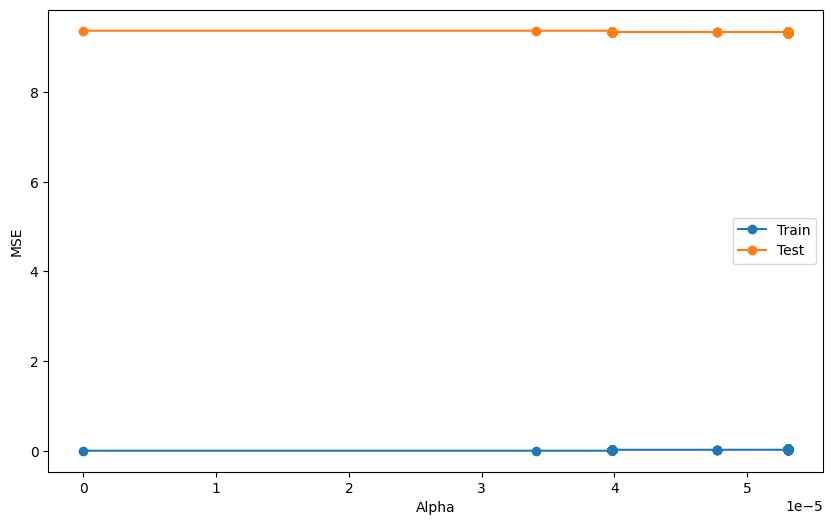

In [25]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
    
ax.plot(ccp_alphas[:1000], MSE_train[:1000], marker='o', label='Train', drawstyle='steps-post')
ax.plot(ccp_alphas[:1000], MSE_test[:1000], marker='o', label='Test', drawstyle='steps-post')

ax.legend()
plt.show()

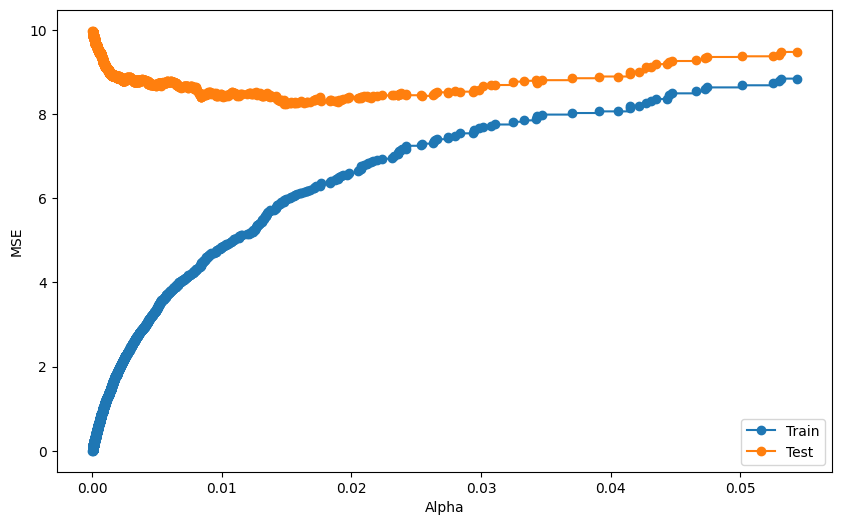

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlabel('Alpha')
ax.set_ylabel('MSE')
    
ax.plot(ccp_alphas[:5950], MSE_train[:5950], marker='o', label='Train', drawstyle='steps-post')
ax.plot(ccp_alphas[:5950], MSE_test[:5950], marker='o', label='Test', drawstyle='steps-post')

ax.legend()
plt.show()

In [ ]:
plt.plot(ccp_alphas, scores)
plt.xlabel('Alpha')
plt.ylabel('Mean MSE')
plt.title('MSE vs Alpha')
plt.legend()

best_idx = np.argmax(scores)
print(f"Best alpha: {ccp_alphas[best_idx]}")
print(f"Best MSE: {scores[best_idx]}")

KeyboardInterrupt: 

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from category_encoders import TargetEncoder
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('target_encoder', TargetEncoder(cols=['nationality'])),
    ('decision_tree', DecisionTreeRegressor(random_state=42))
])

ccp_alphas = np.linspace(ccp_alphas.min(), ccp_alphas.max(), 50)

param_grid = {
    'decision_tree__ccp_alpha': ccp_alphas
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=kf,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

best_ccp_alpha = grid_search.best_params_['decision_tree__ccp_alpha']
print(f"Optimal ccp_alpha: {best_ccp_alpha}")

print(f"Best CV Score (Negative MSE): {grid_search.best_score_}")